<a href="https://colab.research.google.com/github/JovanMilinkovic/Bike_Data/blob/main/bike_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
bike_data = pd.read_csv('train.csv')

In [ ]:
bike_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
bike_data['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
bike_data['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
bike_data['temp']


0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [ ]:
bike_data['temperature_zones'] = bike_data['temp']

In [ ]:
bike_data['temperature_zones'] = bike_data['temperature_zones'].astype('str')

In [ ]:
bike_data['temperature_zones']

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temperature_zones, Length: 10886, dtype: object

In [ ]:
bike_data['temperature_zones'].loc[bike_data['temp'] < 10] = 'freezing'
bike_data['temperature_zones'].loc[np.logical_and(bike_data['temp'] > 10, bike_data['temp'] < 20)] = 'cold'
bike_data['temperature_zones'].loc[np.logical_and(bike_data['temp'] > 20, bike_data['temp'] < 30)] = 'comfortable'
bike_data['temperature_zones'].loc[bike_data['temp'] > 30] = 'hot'

<ipython-input-14-2b54e4ad21bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['temperature_zones'].loc[bike_data['temp'] < 10] = 'freezing'
<ipython-input-14-2b54e4ad21bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['temperature_zones'].loc[np.logical_and(bike_data['temp'] > 10, bike_data['temp'] < 20)] = 'cold'
<ipython-input-14-2b54e4ad21bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['tempe

In [ ]:
bike_data['temperature_zones'].unique()

array(['freezing', 'cold', 'comfortable', 'hot'], dtype=object)

<Axes: xlabel='temperature_zones', ylabel='Count'>

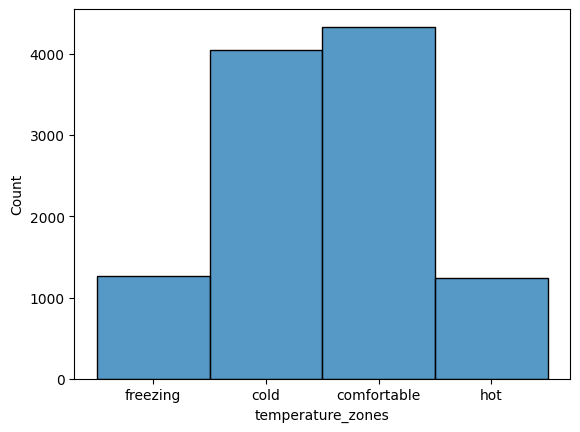

In [ ]:
sns.histplot(data = bike_data['temperature_zones'])

In [ ]:
print(np.unique(bike_data['temperature_zones'], return_counts = True))
bike_data['temperature_zones'].value_counts()

(array(['cold', 'comfortable', 'freezing', 'hot'], dtype=object), array([4049, 4334, 1259, 1244]))


temperature_zones
comfortable    4334
cold           4049
freezing       1259
hot            1244
Name: count, dtype: int64

<Axes: xlabel='datetime', ylabel='count'>

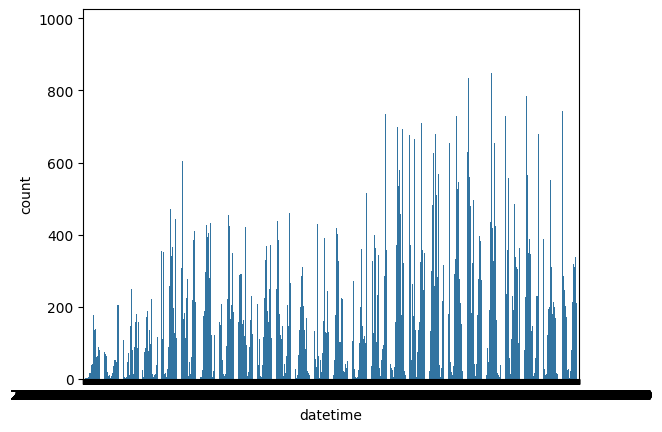

In [ ]:
sns.barplot(data = bike_data, x = 'datetime', y = 'count')

<Axes: >

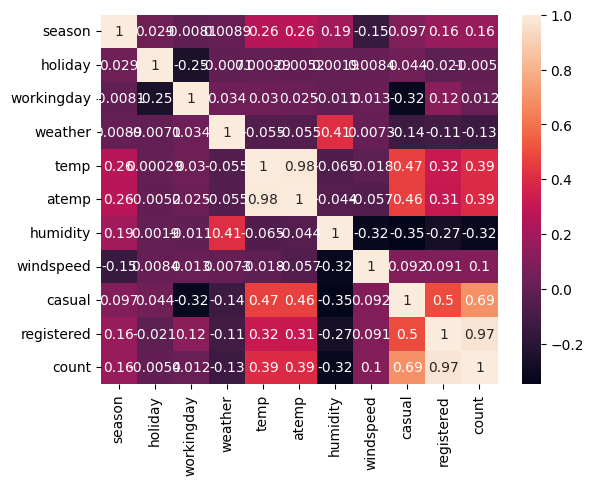

In [ ]:
sns.heatmap(data = bike_data.drop(['datetime', 'temperature_zones'], axis = 1).corr(), annot = True)


In [ ]:
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           10886 non-null  object 
 1   season             10886 non-null  int64  
 2   holiday            10886 non-null  int64  
 3   workingday         10886 non-null  int64  
 4   weather            10886 non-null  int64  
 5   temp               10886 non-null  float64
 6   atemp              10886 non-null  float64
 7   humidity           10886 non-null  int64  
 8   windspeed          10886 non-null  float64
 9   casual             10886 non-null  int64  
 10  registered         10886 non-null  int64  
 11  count              10886 non-null  int64  
 12  temperature_zones  10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB
None


<Axes: xlabel='datetime', ylabel='humidity'>

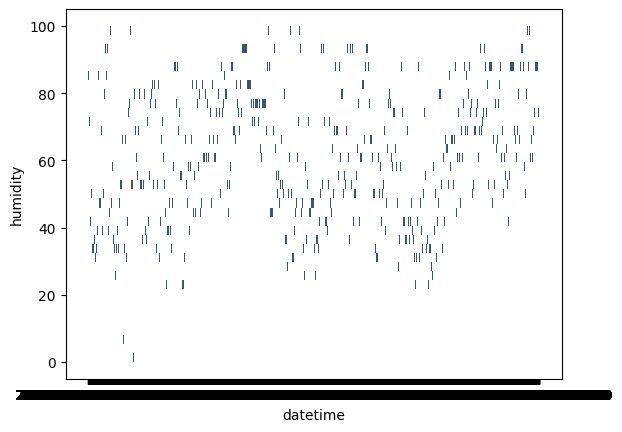

In [ ]:
sns.histplot(data = bike_data, x = 'datetime', y = 'humidity')

<Axes: xlabel='humidity', ylabel='Count'>

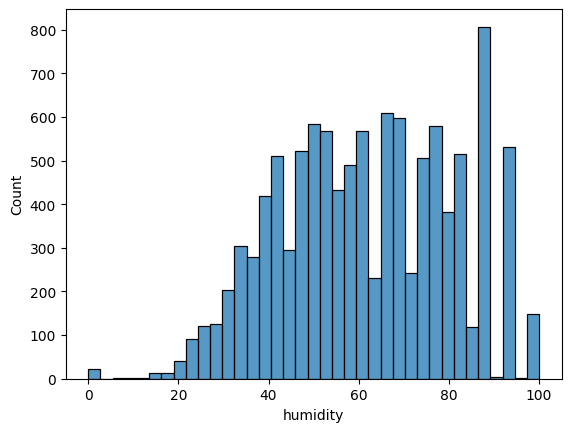

In [ ]:
sns.histplot(data = bike_data['humidity'])

In [ ]:
from datetime import datetime

In [ ]:
indexes = np.logical_and(bike_data['season'] == 2, bike_data['workingday'] == 1)
indexes = np.logical_and(indexes, bike_data['temp'] < 15)
indexes = np.logical_and(indexes, bike_data['windspeed'] > 12)

print(bike_data[indexes])

                 datetime  season  holiday  workingday  weather   temp  \
1325  2011-04-01 02:00:00       2        0           1        3  10.66   
1326  2011-04-01 03:00:00       2        0           1        2   9.84   
1327  2011-04-01 04:00:00       2        0           1        2   9.84   
1328  2011-04-01 05:00:00       2        0           1        3   9.84   
1329  2011-04-01 06:00:00       2        0           1        3   9.84   
...                   ...     ...      ...         ...      ...    ...   
7055  2012-04-12 08:00:00       2        0           1        1  13.12   
7056  2012-04-12 09:00:00       2        0           1        1  14.76   
7072  2012-04-13 01:00:00       2        0           1        1  14.76   
7073  2012-04-13 02:00:00       2        0           1        1  13.94   
7078  2012-04-13 07:00:00       2        0           1        1  13.94   

       atemp  humidity  windspeed  casual  registered  count temperature_zones  
1325  12.880        93    12.9

In [ ]:
def compare(data):
  names = {
      1:'Vedro',
      2:'Oblacno',
      3:'Kisovito',
      4:'Jako kisovito'
  }
  unique, counts = np.unique(data, return_counts = True)
  index = 0
  for i in range(1, len(unique)):
    if counts[i] > counts[index]:
      index = i
  print(names[unique[index]], counts[index])

In [ ]:
compare(bike_data['weather'])

Vedro 7192


In [ ]:
seasons = {
      1:'prolece',
      2:'leto',
      3:'jesen',
      4:'zima'
  }

for i in range(1, 5):
  result = np.sum(bike_data['casual'][bike_data['season'] == i])
  print(seasons[i], '=', result)

prolece = 41605
leto = 129672
jesen = 142718
zima = 78140


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
y = bike_data['count']
X = bike_data.drop(['count', 'temperature_zones', 'datetime'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
model = LogisticRegression(max_iter = 4000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=4000)

In [ ]:
from sklearn import metrics

In [ ]:
print('Srednja apsolutna greška:', metrics.mean_absolute_error(y_test, y_pred))
print('Srednja kvadratna greška:', metrics.mean_squared_error(y_test, y_pred))
print('Koren iz srednje kvadratne greške:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))